In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import re
import src.visualización as vs
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [4]:
df = pd.read_csv("data/clean_sharks.csv", index_col =0) #para que no me figure la columna Unnamed: 0

In [5]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal (Y/N),Time,Species_s,Investigator or Source,Date_month
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,No injury,Unknown,18h00,White shark,"R. Collier, GSAF",Juny
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11,Minor injury,Unknown,14h00 -15h00,other_specie,"K.McMurray, TrackingSharks.com",Juny
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48,Leg injury,Unknown,07h45,other_specie,"K.McMurray, TrackingSharks.com",Juny
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,male,M,Unknown,Minor injury,Unknown,Unknown,other_specie,"B. Myatt, GSAF",Juny
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,Unknown,Hand injury,Unknown,Unknown,Tiger shark,A .Kipper,Juny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Diving,Ahmun,M,Unknown,Fatal injury,Y,Unknown,other_specie,"H. Taunton; N. Bartlett, pp. 233-234",Other
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,Fatal injury,Y,Unknown,other_specie,"F. Schwartz, p.23; C. Creswell, GSAF",Other
6300,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",other,Jules Patterson,M,Unknown,Fatal injury,Y,Unknown,other_specie,"The Sun, 10/20/1938",Other
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,Fatal injury,Y,Unknown,other_specie,S.W. Baker,Other


### Voy a crearme un dataframe solo con las columnas que necesito para comprobar mis hipótesis.

In [6]:
df=df[["Sex_", "Activity", "Date", "Area", "Species_s", "Country","Date_month"]]

In [7]:
df.head()

,Sex_,Activity,Date,Area,Species_s,Country,Date_month
0,F,Paddling,25-Jun-2018,California,White shark,USA,Juny
1,F,Standing in water,18-Jun-2018,Georgia,other_specie,USA,Juny
2,M,other,09-Jun-2018,Hawaii,other_specie,USA,Juny
3,M,other,08-Jun-2018,New South Wales,other_specie,AUSTRALIA,Juny
4,M,Diving,04-Jun-2018,Colima,Tiger shark,MEXICO,Juny


### Para comprobar mis hipótesis necesitaré agrupar las columnas que quiero comparar, antes de ello voy a eliminar los valores Unknown y other que no me dan valor a mi gráfico.

## HIPÓTESIS 1: Se dan más ataques a hombres que practican wind surfing que en hombres que practican natación

In [10]:
df_sex_activity = df[(df["Sex_"] != 'Unknown')& (df["Activity"] != 'other')] 
df_sex_activity

,Sex_,Activity,Date,Area,Species_s,Country,Date_month
0,F,Paddling,25-Jun-2018,California,White shark,USA,Juny
1,F,Standing in water,18-Jun-2018,Georgia,other_specie,USA,Juny
4,M,Diving,04-Jun-2018,Colima,Tiger shark,MEXICO,Juny
5,M,Kite,03-Jun-2018,New South Wales,other_specie,AUSTRALIA,Juny
6,M,Swimming,03-Jun-2018,Pernambuco,Tiger shark,BRAZIL,Juny
...,...,...,...,...,...,...,...
6296,M,Swimming,Before 1906,New South Wales,Nurse shark,AUSTRALIA,Other
6297,M,Diving,Before 1903,Western Australia,other_specie,AUSTRALIA,Other
6298,M,Diving,Before 1903,Western Australia,other_specie,AUSTRALIA,Other
6299,M,Swimming,1900-1905,North Carolina,other_specie,USA,Other


In [28]:
df_plot = pd.DataFrame(df_sex_activity.groupby(["Sex_", "Activity"]).agg({"Sex_": "count"})) #me devuelve una serie, las columnas me salen como índices

In [29]:
df_plot.columns = ["count"]
df_plot.reset_index()

,Sex_,Activity,count
0,F,Bathing,20
1,F,Boat,8
2,F,Body Boarding,13
3,F,Boogie Board,16
4,F,Diving,28
5,F,Fishing,23
6,F,Floating,8
7,F,Interact with sharks,17
8,F,Jumping,4
9,F,Kite,1


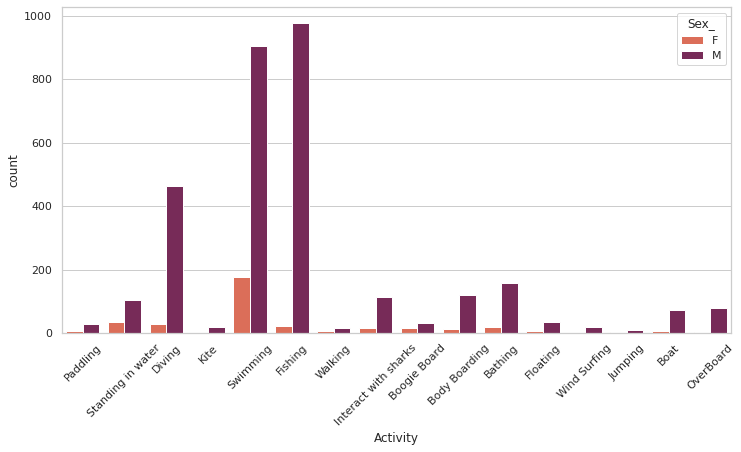

In [78]:
sns.countplot(x="Activity", hue="Sex_", data = df_sex_activity, palette="rocket_r")
plt.xticks(rotation=45);

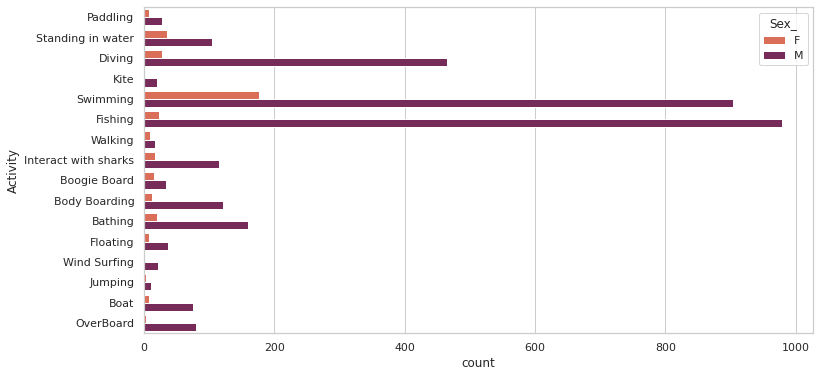

In [79]:
sns.countplot(y="Activity", hue="Sex_", data = df_sex_activity,  palette="rocket_r");

#### Las gráficas me están dando la información que le pido, pero como haya tanta diferencia entre unos valores y otros no queda demsiado visual, por ello voy a filtrar solo con las dos actividades que estoy comparando para comprobar mi hipótesis.

In [83]:
df_activity_sex = df[(df["Activity"].isin(["Wind Surfing","Swimming"])) & (df["Sex_"]!= 'Unknown')]
df_activity_sex

,Sex_,Activity,Date,Area,Species_s,Country,Date_month
6,M,Swimming,03-Jun-2018,Pernambuco,Tiger shark,BRAZIL,Juny
12,M,Swimming,13-May-2018,South Carolina,other_specie,USA,May
17,M,Swimming,Reported 30-Apr-2018,Hua Hin,other_specie,THAILAND,April
26,M,Swimming,15-Apr-2018,Hua Hin,Bull shark,THAILAND,April
27,M,Swimming,15-Apr-2018,Pernambuco,other_specie,BRAZIL,April
...,...,...,...,...,...,...,...
6288,M,Swimming,Before 17-Jul-1916,North Carolina,other_specie,USA,July
6291,M,Swimming,Before 1911,Unknown,other_specie,ASIA?,Other
6296,M,Swimming,Before 1906,New South Wales,Nurse shark,AUSTRALIA,Other
6299,M,Swimming,1900-1905,North Carolina,other_specie,USA,Other


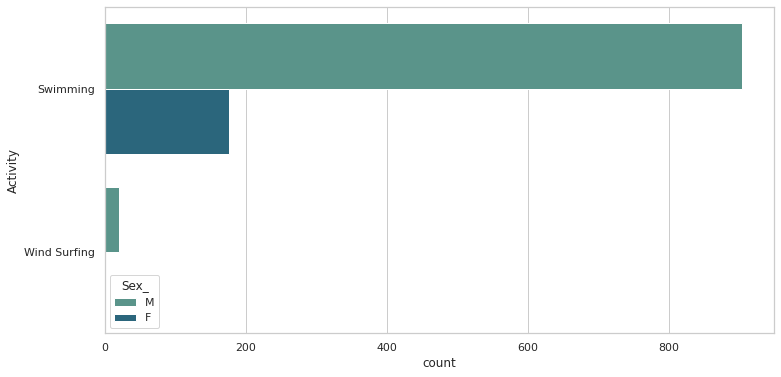

In [84]:
sns.countplot(y="Activity", hue="Sex_", data = df_activity_sex, palette="crest"); 

### Se refuta mi hipótesis ya que se dan más ataques en hombres realizando la actividad swimming que realizando Wind Surfing.

In [ ]:
sns.histplot(data=df_species_country, x="Species_s", hue="Country", multiple="stack")

## HIPÓTESIS 2: Se dan más ataques en junio que en febrero en California

In [16]:
df["Date_month"].unique()

array(['Juny', 'May', 'April', 'March', 'February', 'January', 'December',
       'November', 'October', 'September', 'August', 'July', 'Other'],
      dtype=object)

In [17]:
df["Area"].unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', 'Unknown', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island

#### Como solo quiero comprobar los ataques en California, filtro este área creando un df para ello

In [19]:
df_Datemonth_Area = df[(df["Area"] == 'California')]
df_Datemonth_Area

,Sex_,Activity,Date,Area,Species_s,Country,Date_month
0,F,Paddling,25-Jun-2018,California,White shark,USA,Juny
54,F,other,30-Dec-2017,California,other_specie,USA,December
60,M,Fishing,24-Nov-2017,California,White shark,USA,November
105,M,Fishing,01-Aug-2017,California,White shark,USA,August
116,M,other,20-Jul-2017,California,White shark,USA,July
...,...,...,...,...,...,...,...
5833,M,Bathing,3-Jul-1879,California,other_specie,USA,July
6026,M,Diving,1851,California,other_specie,USA,Other
6194,M,Fishing,Before 1908,California,other_specie,USA,Other
6230,M,Diving,"No date, Before 1963",California,other_specie,USA,Other


In [45]:
#df_plot2 = pd.DataFrame(df_Datemonth_Area.groupby(["Date_month", "Area"]).agg({"Area": "count"})) NO HACE FALTA AGRUPAR PORQUE YA LE ESTOY DANDO LAS CONDICIONES DE FILTRO POR CALIFORNIA Y TODOS LOS VALORES DE DATE_MONTH

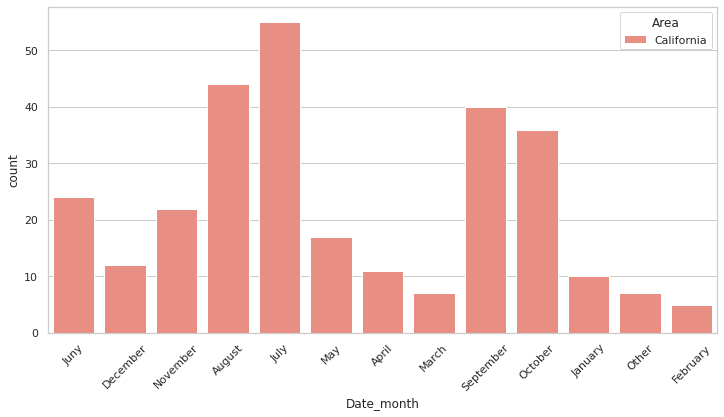

In [74]:
sns.countplot(x="Date_month", hue="Area", data = df_Datemonth_Area, palette ="dark:salmon_r")
plt.xticks(rotation=45);

### Se confirma mi segunda hipótesis de que se dan más ataques en el mes de junio que en el mes de febrero.

## HIPÓTESIS 3: El tiburón White shark provoca más ataques en USA que en Australia

In [26]:
df["Species_s"].unique()

array(['White shark', 'other_specie', 'Tiger shark', 'Lemon shark',
       'Bull shark', 'Grey shark', 'Nurse shark',
       'Involvement not confirmed', 'Wobbegong shark', 'Blacktip shark',
       'Galapagos shark', 'Blue shark', 'Spinner shark',
       'Porbeagle shark', 'Caribbean reef shark', 'Sevengill shark',
       'Angel shark', 'Dogfish shark', 'Mako shark', 'Whaler shark',
       'Silky shark', 'Hammerhead shark', 'Raggedtooth shark',
       'Goblin shark', 'Sand shark', 'Cow shark', 'Salmon shark',
       'Zambesi shark', 'Thresher shark', 'Dusky shark', 'Red shark',
       'Copper shark', 'Leopard shark', 'Silvertip shark',
       'Zambezi shark', 'Blacktail shark'], dtype=object)

In [27]:
df["Country"].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'Unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

#### Como solo quiero comprobar los ataques en USA y en Autralia, y solo el tiburón blanco filtro ambos países creando un df para ello

In [ ]:
& (df["Species_s"] == 'Whithe shark')

In [50]:
df_species_country = df[(df["Country"].isin(["USA","AUSTRALIA"])) & (df["Species_s"] == 'White shark')]

In [51]:
df_species_country

,Sex_,Activity,Date,Area,Species_s,Country,Date_month
0,F,Paddling,25-Jun-2018,California,White shark,USA,Juny
22,M,other,24-Apr-2018,Western Australia,White shark,AUSTRALIA,April
40,F,Swimming,23-Feb-2018,New South Wales,White shark,AUSTRALIA,February
50,M,Diving,13-Jan-2018,New South Wales,White shark,AUSTRALIA,January
60,M,Fishing,24-Nov-2017,California,White shark,USA,November
...,...,...,...,...,...,...,...
5329,M,other,Ca. 1915,Florida,White shark,USA,Other
5598,M,Fishing,1898,South Carolina,White shark,USA,Other
6007,M,Diving,28-Sept-1853,North Carolina,White shark,USA,September
6011,M,Diving,Sep or Oct-1853,North Carolina,White shark,USA,September


In [44]:
df_plot1 = pd.DataFrame(df_species_country.groupby(["Country","Species_s"]).agg({"Country": "count"}))

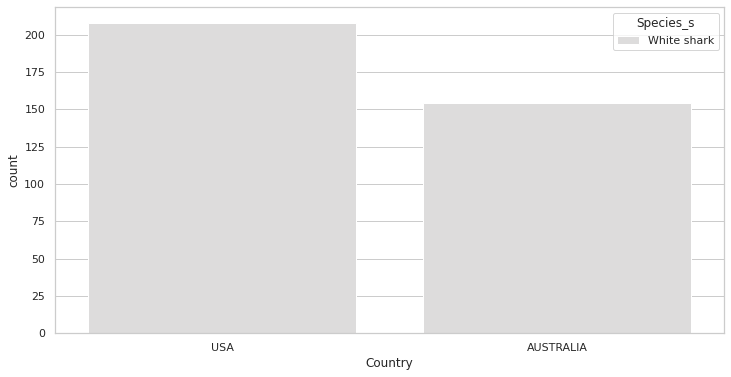

In [94]:
sns.countplot(x="Country", hue="Species_s", data = df_species_country, palette ="coolwarm");


<AxesSubplot:xlabel='Species_s', ylabel='Count'>

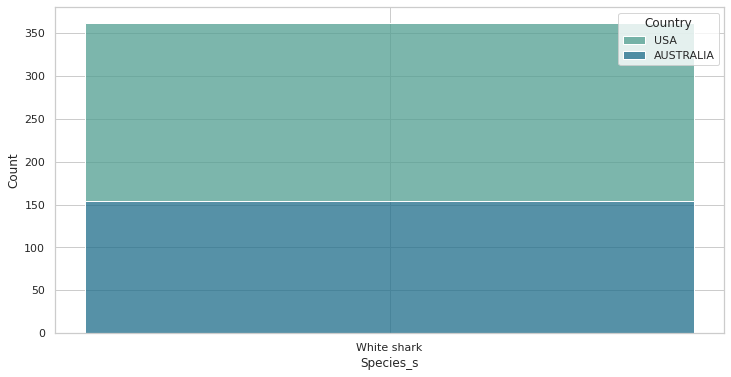

In [76]:
sns.histplot(data=df_species_country, x="Species_s", hue="Country", multiple="stack", palette="crest")

### Se confirma mi hipótesis 3 de que hay más ataques de tiburón blanco en USA que en Australia